In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [53]:
df = pd.read_csv('C:\\Users\\kavya\\OneDrive\\Documents\\final_dataset.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,title,country,date_added,release_year,mpaa rating,duration,listed_in,description,user_rating
0,Limitless,United States,"July 1, 2016",2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy",A failed musician unleashes his brain's full p...,84.000000
1,Gilmore Girls: A Year in the Life,United States,"November 25, 2016",2016,TV-14,1 Season,"TV Comedies, TV Dramas, Teen TV Shows",Set nearly a decade after the finale of the or...,77.000000
2,Charmed,United States,"October 1, 2017",2005,TV-PG,8 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...,90.000000
3,Revenge,NaN,"May 2, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a mother and her daughter are gang-raped...,84.000000
4,The Jungle Book,"India, Germany, France","May 11, 2019",2010,TV-Y7,1 Season,Kids' TV,This animated series follows young Mowgli and ...,97.000000
5,American Crime Story: The People v. O.J. Simpson,United States,"March 6, 2019",2016,TV-MA,1 Season,"Crime TV Shows, TV Dramas",This anthology series dramatizes historic crim...,79.000000
6,Dave Chappelle,United States,"March 21, 2017",2017,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Dave Chappelle makes his triumphan...,94.000000
7,Cheer Squad,United States,"March 14, 2017",2016,TV-PG,1 Season,"Reality TV, Teen TV Shows","Follow the Great White Sharks, a world-champio...",61.000000
8,Barbie Life in the Dreamhouse,United States,"July 1, 2017",2012,TV-G,1 Season,"Kids' TV, TV Comedies",Join blond icon Barbie and her fabulous friend...,85.000000
9,DreamWorks Shrek's Swamp Stories,United States,"August 17, 2012",2008,TV-PG,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","Shrek celebrates Halloween, Puss in Boots is c...",56.000000


In [54]:
genreSet = set()
genreList = list(genreSet)
genreDict = {}

for index, row in df.iterrows():
    genreList = row.listed_in.split(', ')
    for genre in genreList:
        genreSet.add(genre)

for genre in genreSet:
    genreList.append(genre)
    genreDict[genre] = [0,0]
    
for genre in genreList:
    for index, row in df.iterrows():
        if genre in row.listed_in:
            genreDict[genre][0] += 1
            genreDict[genre][1] += row.user_rating

In [55]:
# Create a dataframe with genres Ratings as rows.
genre_df = pd.DataFrame({'genre':genreList})
genre_final_df = pd.DataFrame(columns = ['Genre', 'User_Rating'])
# final_df = final_df.append(pd.Series(currRow, index=final_df.columns), ignore_index=True)
    
for genre in genreList:
    currRow = [genre, genreDict[genre][1]/genreDict[genre][0]]
    genre_final_df = genre_final_df.append(pd.Series(currRow, index=genre_final_df.columns), ignore_index=True)

genre_final_df

,Genre,User_Rating
0,Classic & Cult TV,98.000000
1,TV Comedies,84.238095
2,Crime TV Shows,91.000000
3,British TV Shows,94.000000
4,Reality TV,65.000000
5,TV Comedies,84.238095
6,Teen TV Shows,76.800000
7,Classic & Cult TV,98.000000
8,International TV Shows,78.833333
9,Stand-Up Comedy & Talk Shows,94.000000


In [56]:
sorted_df = genre_final_df.sort_values(by=['User_Rating'], ascending=False)
sorted_df

,Genre,User_Rating
0,Classic & Cult TV,98.000000
7,Classic & Cult TV,98.000000
17,TV Mysteries,95.250000
3,British TV Shows,94.000000
9,Stand-Up Comedy & Talk Shows,94.000000
19,TV Thrillers,92.833333
11,Romantic TV Shows,91.250000
2,Crime TV Shows,91.000000
13,Docuseries,88.000000
15,Science & Nature TV,88.000000


In [57]:
final_df = sorted_df.drop(0)
final_df

,Genre,User_Rating
7,Classic & Cult TV,98.000000
17,TV Mysteries,95.250000
3,British TV Shows,94.000000
9,Stand-Up Comedy & Talk Shows,94.000000
19,TV Thrillers,92.833333
11,Romantic TV Shows,91.250000
2,Crime TV Shows,91.000000
13,Docuseries,88.000000
15,Science & Nature TV,88.000000
21,TV Sci-Fi & Fantasy,87.500000


In [58]:
genres = final_df.Genre
genres

7                Classic & Cult TV
17                    TV Mysteries
3                 British TV Shows
9     Stand-Up Comedy & Talk Shows
19                    TV Thrillers
11               Romantic TV Shows
2                   Crime TV Shows
13                      Docuseries
15             Science & Nature TV
21             TV Sci-Fi & Fantasy
18                       TV Dramas
5                      TV Comedies
1                      TV Comedies
14           TV Action & Adventure
8           International TV Shows
6                    Teen TV Shows
16                        Kids' TV
12                    Anime Series
20                       TV Horror
10       Spanish-Language TV Shows
4                       Reality TV
Name: Genre, dtype: object

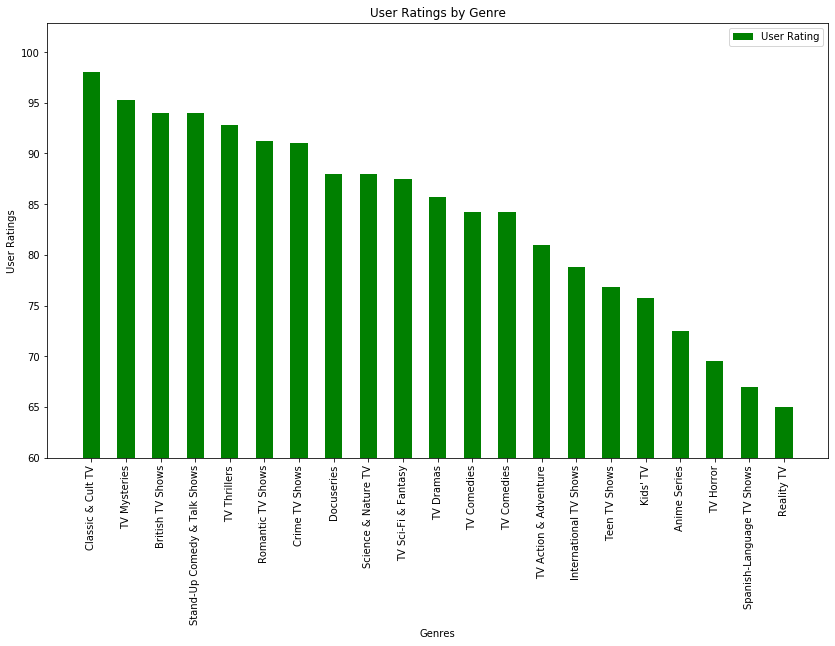

In [59]:
w = 0.5
label_locations = np.arange(final_df.shape[0])
tickvalues = range(0,len(genres))

plt.bar(label_locations, final_df['User_Rating'], width=w, label='User Rating', color='green')
plt.gcf().set_size_inches(14, 8)
plt.ylim(bottom=60)
plt.title('User Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('User Ratings')
plt.xticks(ticks = tickvalues ,labels = genres, rotation = 'vertical')
plt.legend()
plt.show()

In [60]:
def get_quantile_indexes(n, p):
    '''
    Calculate index values as input for interpolation
    
    input
    _____
    n (list) - the list of numbers
    p (float) - the percentage corresponding to the quantile (ex:0.25)
    
    output
    ______
    l, i, u (float) - the corresponding x1, x, x1 values as calculated via class
    '''
    i = p*(n+1) - 1
    l = np.floor(i)
    u = np.ceil(i)
    return l,i,u


def get_quantile(nums, q):
    '''
    Use the in-class method of interpolation to calculate the quantile
    
    input
    _____
    nums (list) - the list of numbers
    q (float) - the quantile desired
    
    output
    ______
    y (int/float) - this is the value in nums at the given quantile q
    '''
    x1, x, x2 = get_quantile_indexes(len(nums),q)
    if np.floor(x) == x1 and np.ceil(x) == x1:
        x = int(x)
        y = nums[x]
        # print('x = {}, y = {}'.format(x, y))
        return y
        
    # print('x1, x, x2 = {}, {}, {}'.format(x1, x, x2))
    y1, y2 = nums[int(x1)], nums[int(x2)]
    # print('y1, y2 = {}, {}'.format(y1, y2))
    y = (x - x1) * (y1-y2) / (x1 - x2) + y1
    # print('y =', y)
    return y

In [61]:
def q_summary_V2(numbers):
    dict = {'min':'','q1':'','q2':'','q3':'','max':''}
    outliers = []
    
    q1 = get_quantile(numbers, .25)
    q2 = get_quantile(numbers, .50)
    q3 = get_quantile(numbers, .75)
    
    IQR = q3 - q1
    lowerBound = q1 - 1.5*IQR
    upperBound = q3 + 1.5*IQR
    
    
    for i in numbers:
        if i < lowerBound or i > upperBound:
            outliers.append(i)
            numbers.remove(i)
    
    dict['q1'] = q1
    dict['q2'] = q2
    dict['q3'] = q3
    dict['min'] = min(numbers)
    dict['max'] = max(numbers)
    
    if (len(outliers) != 0) :
        print("The following are outliers: ", outliers)
        
    print(dict)

In [84]:
ratings = []
for index, row in final_df.iterrows():
    rating = row.User_Rating
    ratings.append(rating)
    
ratingsList = list(np.around(np.array(ratings),2))
ratingsList.sort()

In [85]:
q_summary_V2(ratingsList)

{'min': 65.0, 'q1': 76.27, 'q2': 85.74, 'q3': 92.03999999999999, 'max': 98.0}


In [92]:
mean = np.mean(ratingsList).round(2)
std = np.std(ratingsList).round(2)
print(mean)
print(std)

83.83
9.5
